## Import Section

In [1]:
import pandas as pd
import numpy as np

## Reading CSV and storing into a DataFrame

In [2]:
df = pd.read_csv('candy_crush.csv')

In [3]:
df.head()

,player_id,dt,level,num_attempts,num_success
0,6dd5af4c7228fa353d505767143f5815,2014-01-04,4,3,1
1,c7ec97c39349ab7e4d39b4f74062ec13,2014-01-01,8,4,1
2,c7ec97c39349ab7e4d39b4f74062ec13,2014-01-05,12,6,0
3,a32c5e9700ed356dc8dd5bb3230c5227,2014-01-03,11,1,1
4,a32c5e9700ed356dc8dd5bb3230c5227,2014-01-07,15,6,0


In [4]:
df.shape

(16865, 5)

## Data Validation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16865 entries, 0 to 16864
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   player_id     16865 non-null  object
 1   dt            16865 non-null  object
 2   level         16865 non-null  int64 
 3   num_attempts  16865 non-null  int64 
 4   num_success   16865 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 658.9+ KB


In [6]:
print("Number of players: ",df['player_id'].nunique())
print("Date Range for the data: ",min(df.dt),'-->',max(df.dt))

Number of players:  6814
Date Range for the data:  2014-01-01 --> 2014-01-07


## Data Visualization

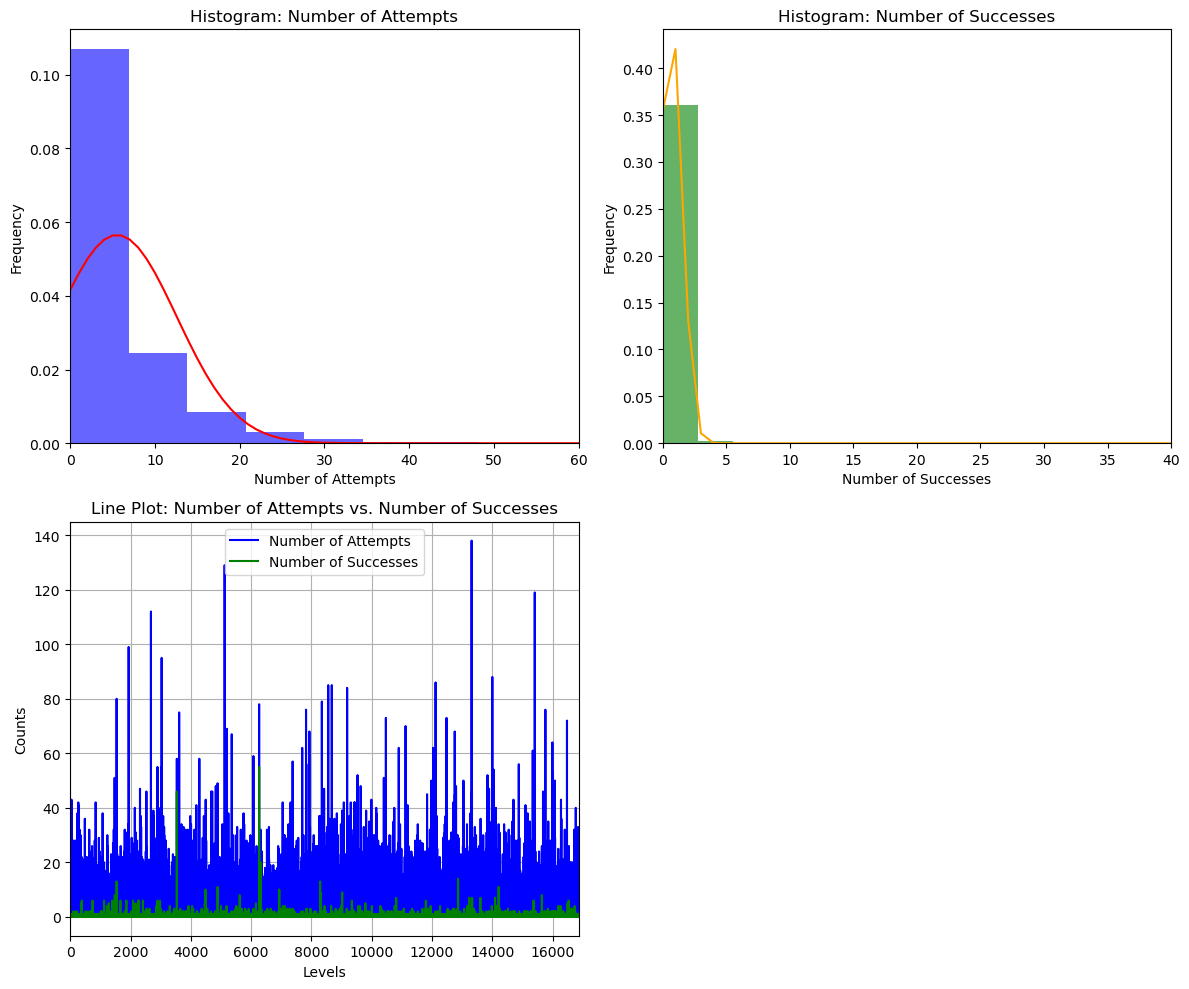

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats




fig, axs = plt.subplots(2, 2, figsize=(12, 10))


axs[0, 0].hist(df['num_attempts'], bins=20, density=True, alpha=0.6, color='blue')
axs[0, 0].set_title('Histogram: Number of Attempts')
axs[0, 0].set_xlabel('Number of Attempts')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_xlim(0, 60)  


mu_attempts, sigma_attempts = df['num_attempts'].mean(), df['num_attempts'].std()
x_attempts = df['num_attempts']
x_attempts_range = range(int(min(x_attempts)), int(max(x_attempts)) + 1)
bell_curve_attempts = stats.norm.pdf(x_attempts_range, mu_attempts, sigma_attempts)
axs[0, 0].plot(x_attempts_range, bell_curve_attempts, color='red')


axs[0, 1].hist(df['num_success'], bins=20, density=True, alpha=0.6, color='green')
axs[0, 1].set_title('Histogram: Number of Successes')
axs[0, 1].set_xlabel('Number of Successes')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_xlim(0, 40)  


mu_success, sigma_success = df['num_success'].mean(), df['num_success'].std()
x_success = df['num_success']
x_success_range = range(int(min(x_success)), int(max(x_success)) + 1)
bell_curve_success = stats.norm.pdf(x_success_range, mu_success, sigma_success)
axs[0, 1].plot(x_success_range, bell_curve_success, color='orange')


axs[1, 0].plot(df['num_attempts'], label='Number of Attempts', color='blue')
axs[1, 0].plot(df['num_success'], label='Number of Successes', color='green')
axs[1, 0].set_xlabel('Levels')
axs[1, 0].set_ylabel('Counts')
axs[1, 0].set_title('Line Plot: Number of Attempts vs. Number of Successes')
axs[1, 0].set_xlim(0, len(df))  
axs[1, 0].legend()
axs[1, 0].grid(True)


axs[1, 1].axis('off')

plt.tight_layout()
plt.show()






## Outlier Detection and removal

In [8]:
df.isnull().sum()

player_id       0
dt              0
level           0
num_attempts    0
num_success     0
dtype: int64

In [9]:
df.describe()

,level,num_attempts,num_success
count,16865.000000,16865.000000,16865.000000
mean,9.287222,5.535428,0.627157
std,4.343477,7.322476,0.864708
min,1.000000,0.000000,0.000000
25%,6.000000,1.000000,0.000000
50%,9.000000,3.000000,1.000000
75%,14.000000,7.000000,1.000000
max,15.000000,258.000000,55.000000


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

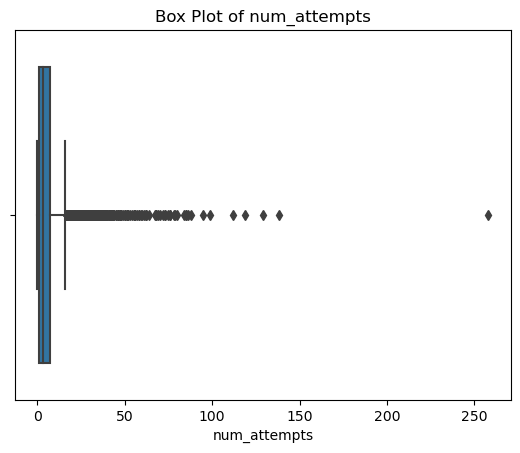

In [11]:
column_name = 'num_attempts'
sns.boxplot(x=df[column_name])
plt.title(f"Box Plot of {column_name}")
plt.xlabel(column_name)
plt.show()


In [12]:
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

In [13]:
IQR = Q3 - Q1

In [14]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [15]:
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

In [16]:
outliers.shape

(1060, 5)

In [17]:
outliers.head()

,player_id,dt,level,num_attempts,num_success
7,ff508e34a5d0157ea5e42f2ff9982660,2014-01-04,12,18,0
9,bef3afe9467a0a4b496a8b72a0840829,2014-01-07,15,27,0
13,cdac1665b7a725f6850682a652e4af34,2014-01-07,15,17,0
41,a96a6d3ea3894291c2134a6a04b2cbc9,2014-01-01,8,43,0
44,b830fd58484c2146e4505dd962718add,2014-01-07,15,25,0


In [18]:
value_count = df[column_name].value_counts()[258]

In [19]:
value_count

1

In [20]:
df.drop(df[df[column_name] == 258].index, inplace=True)

In [21]:
df.describe()

,level,num_attempts,num_success
count,16864.000000,16864.000000,16864.000000
mean,9.287120,5.520458,0.627135
std,4.343586,7.059875,0.864729
min,1.000000,0.000000,0.000000
25%,6.000000,1.000000,0.000000
50%,9.000000,3.000000,1.000000
75%,14.000000,7.000000,1.000000
max,15.000000,138.000000,55.000000


## Hypothesis Testing

In [22]:
df_win_per = df.groupby('level').agg(attempts = ('num_attempts', 'sum'),
                                    wins =('num_success', 'sum')).reset_index()
df_win_per['p_win'] = df_win_per.wins / df_win_per.attempts
df_win_per.head()

,level,attempts,wins,p_win
0,1,1322,818,0.618759
1,2,1285,666,0.518288
2,3,1546,662,0.428202
3,4,1893,705,0.372425
4,5,6937,634,0.091394


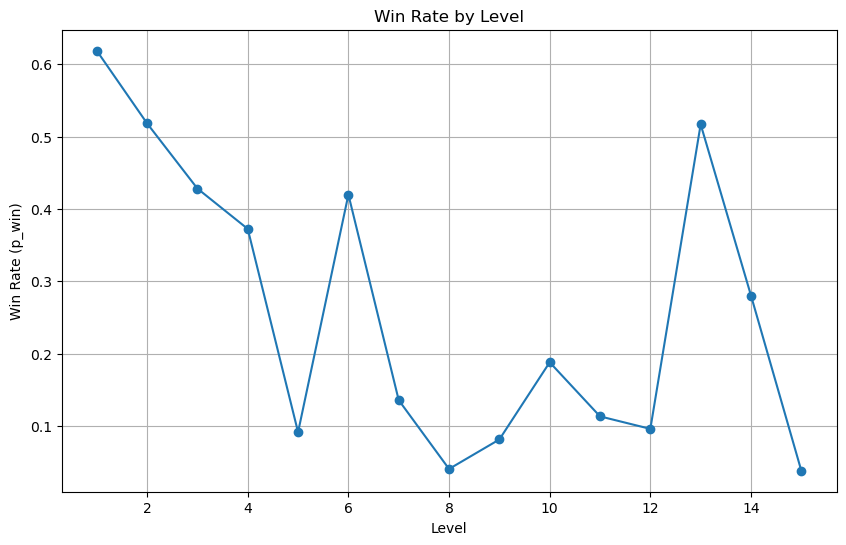

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df_win_per['level'], df_win_per['p_win'], marker='o', linestyle='-')
plt.xlabel('Level')
plt.ylabel('Win Rate (p_win)')
plt.title('Win Rate by Level')
plt.grid(True)
plt.show()


In [24]:
hard_threshold = 0.15 

hard_levels = df_win_per[df_win_per['p_win'] <= hard_threshold]['level'].tolist()
easy_levels = df_win_per[df_win_per['p_win'] > hard_threshold]['level'].tolist()

print("Hard Levels:", hard_levels)
print("Easy Levels:", easy_levels)


Hard Levels: [5, 7, 8, 9, 11, 12, 15]
Easy Levels: [1, 2, 3, 4, 6, 10, 13, 14]


In [25]:
import pandas as pd
import scipy.stats as stats

expected_win_rate = 0.50

win_rate_data = df_win_per['p_win']


sample_mean = win_rate_data.mean()
sample_std = win_rate_data.std()


sample_size = len(win_rate_data)

z_score = (sample_mean - expected_win_rate) / (sample_std / (sample_size ** 0.5))


critical_z_value = stats.norm.ppf(0.95)


if z_score > critical_z_value:
    print("Reject null hypothesis (H_0): The game's difficulty is too easy.")
else:
    print("Fail to reject null hypothesis (H_0): The game's difficulty is not too easy.")



Fail to reject null hypothesis (H_0): The game's difficulty is not too easy.


In [26]:
sample_mean

0.2625959406340536

In [27]:
sample_std

0.19912631982392265

In [28]:
sample_size

15

In [29]:
z_score

-4.617480848636087

In [30]:
critical_z_value

1.6448536269514722

## Data Visualization

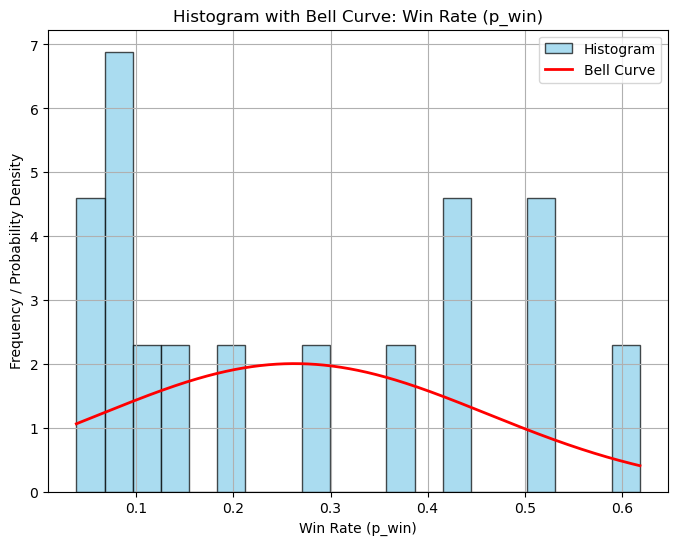

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.figure(figsize=(8, 6))
plt.hist(df_win_per['p_win'], bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black', label='Histogram')

mean = df_win_per['p_win'].mean()
std_dev = df_win_per['p_win'].std()
x = np.linspace(df_win_per['p_win'].min(), df_win_per['p_win'].max(), 1000)
bell_curve = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, bell_curve, 'r-', linewidth=2, label='Bell Curve')

plt.title('Histogram with Bell Curve: Win Rate (p_win)')
plt.xlabel('Win Rate (p_win)')
plt.ylabel('Frequency / Probability Density')
plt.legend()
plt.grid(True)

plt.show()


In [32]:
df_copy = df.copy()

In [33]:
df_copy

,player_id,dt,level,num_attempts,num_success
0,6dd5af4c7228fa353d505767143f5815,2014-01-04,4,3,1
1,c7ec97c39349ab7e4d39b4f74062ec13,2014-01-01,8,4,1
2,c7ec97c39349ab7e4d39b4f74062ec13,2014-01-05,12,6,0
3,a32c5e9700ed356dc8dd5bb3230c5227,2014-01-03,11,1,1
4,a32c5e9700ed356dc8dd5bb3230c5227,2014-01-07,15,6,0
...,...,...,...,...,...
16860,e3e95924b152d5d2b0fcf0cc2b8a4261,2014-01-07,15,1,1
16861,712d953e972844194475f21b9352c1ab,2014-01-01,8,2,0
16862,7fad6b6c0d8c8a5ef69f467511b5262c,2014-01-01,9,10,1
16863,323676bf93f40dda0a96cba8c73c1478,2014-01-06,14,1,1


In [47]:
print(df_copy.isnull().sum())

player_id       0
dt              0
level           0
num_attempts    0
num_success     0
SuccessRate     0
AvgAttempts     0
Cluster         0
dtype: int64


## K_means on player data

In [35]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


df_copy['SuccessRate'] = df_copy.groupby('player_id')['num_success'].transform(lambda x: x.sum() / x.count())
df_copy['AvgAttempts'] = df_copy.groupby('player_id')['num_attempts'].transform('mean')

X = df_copy[['SuccessRate', 'AvgAttempts']]
kmeans = KMeans(n_clusters=3, random_state=42)
df_copy['Cluster'] = kmeans.fit_predict(X)







In [36]:
print(df_copy.isnull().sum())

player_id       0
dt              0
level           0
num_attempts    0
num_success     0
SuccessRate     0
AvgAttempts     0
Cluster         0
dtype: int64


In [37]:
df_copy.head()

,player_id,dt,level,num_attempts,num_success,SuccessRate,AvgAttempts,Cluster
0,6dd5af4c7228fa353d505767143f5815,2014-01-04,4,3,1,0.500000,9.000000,2
1,c7ec97c39349ab7e4d39b4f74062ec13,2014-01-01,8,4,1,0.333333,11.333333,2
2,c7ec97c39349ab7e4d39b4f74062ec13,2014-01-05,12,6,0,0.333333,11.333333,2
3,a32c5e9700ed356dc8dd5bb3230c5227,2014-01-03,11,1,1,0.333333,3.000000,0
4,a32c5e9700ed356dc8dd5bb3230c5227,2014-01-07,15,6,0,0.333333,3.000000,0


In [38]:
df_copy['Cluster'].nunique()

3

## Linear regression to find difficulty for the player

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X, df['level'], test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
score_train = model.score(X_train, y_train)
score_val = model.score(X_val, y_val)
print(f"Training R^2: {score_train:.3f}, Validation R^2: {score_val:.3f}")

Training R^2: 0.078, Validation R^2: 0.048


In [40]:
predict = model.predict(X_val)

In [41]:
distinct_values = df_copy['Cluster'].unique()

In [42]:
distinct_values

array([2, 0, 1])

## Preparing Level Multipliers (RL Rewards)

In [43]:
cluster_characteristics = df_copy.groupby('Cluster').agg(
    Avg_SuccessRate=('SuccessRate', 'mean'),
    Avg_AvgAttempts=('AvgAttempts', 'mean')
)
print("Cluster Characteristics:")
print(cluster_characteristics)


easier_cluster = cluster_characteristics['Avg_SuccessRate'].idxmax()
difficult_cluster = cluster_characteristics['Avg_SuccessRate'].idxmin()

print(f"Easier Cluster: {easier_cluster}")
print(f"Difficult Cluster: {difficult_cluster}")


difficulty_multipliers = {
    cluster: 1.0 for cluster in cluster_characteristics.index
}


difficulty_multipliers[easier_cluster] = 0.8
difficulty_multipliers[difficult_cluster] = 1.2

print("Difficulty Multipliers for Each Cluster:")
print(difficulty_multipliers)

Cluster Characteristics:
         Avg_SuccessRate  Avg_AvgAttempts
Cluster                                  
0               0.659722         3.361111
1               0.650699        26.890220
2               0.512056        10.033324
Easier Cluster: 0
Difficult Cluster: 2
Difficulty Multipliers for Each Cluster:
{0: 0.8, 1: 1.0, 2: 1.2}


## Defining RL Policies

In [44]:
def rl_policy(player_state, player_cluster,difficulty_multipliers):
    difficulty_adjustment = difficulty_multipliers.get(player_cluster, 1.0)
    return difficulty_adjustment


def simulate_game(player_id):
    player_data = df_copy[df_copy['player_id'] == player_id]
    player_state = {'SuccessRate': player_data['SuccessRate'].values[0],
                    'AvgAttempts': player_data['AvgAttempts'].values[0]}
    player_cluster = player_data['Cluster'].values[0]
    
    predicted_difficulty = model.predict([[player_state['SuccessRate'], player_state['AvgAttempts']]])
    
    rl_adjustment = rl_policy(player_state, player_cluster,difficulty_multipliers)
    final_difficulty = predicted_difficulty * rl_adjustment
    return final_difficulty


player_id = "c7ec97c39349ab7e4d39b4f74062ec13" #random player_id
next_level_difficulty = simulate_game(player_id)
print(f"Next Level Difficulty for Player {player_id}: {next_level_difficulty}")


Next Level Difficulty for Player c7ec97c39349ab7e4d39b4f74062ec13: [12.8178999]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
